<a href="https://colab.research.google.com/github/el-thobhy/rainfall-prediction/blob/master/test_code_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [1]:
import pandas as pd
import seaborn as sns

c:\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Data Loading

In [2]:
data_baru = pd.read_csv('data.csv')
data_baru = data_baru[0:4000]

### Explanatory Data Analysis

_*Variable description*_

- Date and Time = Date and Time
- Air Tmp (C) M 60 Min
- Mag WD 60 Min (deg) M
- Precip 1Hr (mm) M
- QNH (hPa) M
- RH (%) M 60 Min
- True WD 60 Min (deg) M
- WS 60 Min (kt) M
- klasifikasi

In [3]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             4000 non-null   object 
 1   temperature_2m_max (°C)          3985 non-null   float64
 2   temperature_2m_min (°C)          3985 non-null   float64
 3   apparent_temperature_max (°C)    3985 non-null   float64
 4   apparent_temperature_min (°C)    3985 non-null   float64
 5   sunrise (iso8601)                4000 non-null   object 
 6   sunset (iso8601)                 4000 non-null   object 
 7   shortwave_radiation_sum (MJ/m²)  3982 non-null   float64
 8   rain_sum (mm)                    3982 non-null   float64
 9   snowfall_sum (cm)                3982 non-null   float64
 10  windspeed_10m_max (km/h)         3985 non-null   float64
 11  windgusts_10m_max (km/h)         3985 non-null   float64
 12  winddirection_10m_do

In [4]:
data_baru.sort_values(by=['time'], inplace=True, ascending=True)
data_baru.set_index('time', inplace= True)

#### Missing value

In [5]:
data_baru.describe()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation
count,3985.000000,3985.000000,3985.000000,3985.000000,3982.000000,3982.000000,3982.0,3985.000000,3985.000000,3928.000000,3982.000000,4000.0
mean,30.439297,25.461179,36.602033,30.310816,20.877421,5.227197,0.0,12.841230,28.535508,174.452138,4.293348,0.0
std,1.946172,1.122115,3.127622,1.935845,3.751479,8.462843,0.0,5.041113,6.834369,73.484181,0.807658,0.0
min,23.800000,20.700000,25.700000,23.100000,4.320000,0.000000,0.0,3.600000,12.200000,0.000000,1.340000,0.0
25%,28.900000,24.900000,34.600000,29.200000,18.920000,0.000000,0.0,8.800000,23.800000,124.000000,3.810000,0.0
50%,30.700000,25.600000,36.800000,30.700000,21.100000,1.600000,0.0,12.000000,27.700000,168.000000,4.320000,0.0
75%,31.900000,26.200000,38.900000,31.700000,23.580000,7.300000,0.0,16.200000,32.400000,217.000000,4.810000,0.0
max,36.000000,28.500000,46.200000,34.500000,28.290000,107.900000,0.0,33.100000,61.600000,360.000000,7.000000,0.0


_ada lebih dari 100 data yang hilang, total data adalah 2039, dan yang terhitung 1900_

In [6]:
data_baru.isnull().sum()

temperature_2m_max (°C)            15
temperature_2m_min (°C)            15
apparent_temperature_max (°C)      15
apparent_temperature_min (°C)      15
sunrise (iso8601)                   0
sunset (iso8601)                    0
shortwave_radiation_sum (MJ/m²)    18
rain_sum (mm)                      18
snowfall_sum (cm)                  18
windspeed_10m_max (km/h)           15
windgusts_10m_max (km/h)           15
winddirection_10m_dominant (°)     72
et0_fao_evapotranspiration (mm)    18
elevation                           0
city                                0
dtype: int64

In [7]:
data_baru = data_baru.dropna(how='any',axis=0) 
data_baru.shape

(3928, 15)

In [8]:
data_baru.isnull().sum()

temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
sunrise (iso8601)                  0
sunset (iso8601)                   0
shortwave_radiation_sum (MJ/m²)    0
rain_sum (mm)                      0
snowfall_sum (cm)                  0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
elevation                          0
city                               0
dtype: int64

#### Pesebaran data

dilihat dengan histogram

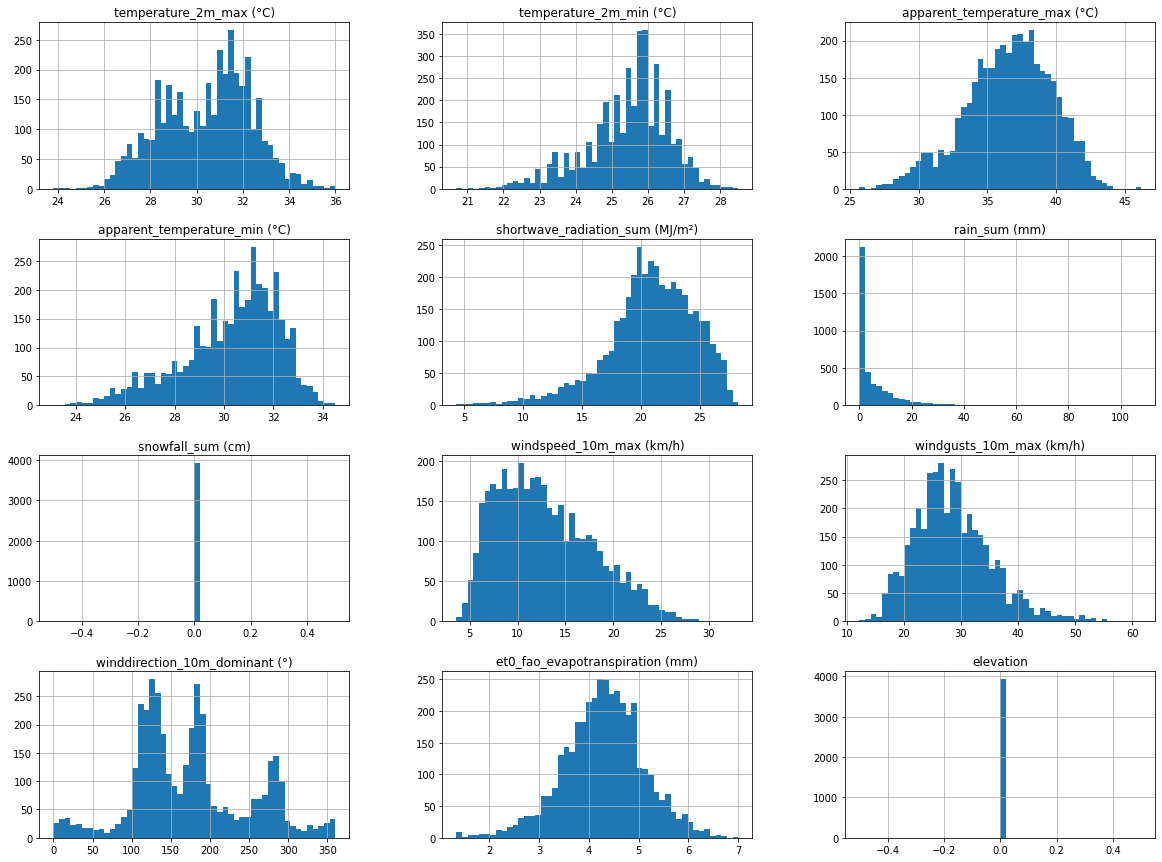

In [9]:
import matplotlib.pyplot as plt

data_baru.hist(bins=50, figsize=(20,15))
plt.show()

#### Matriks korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

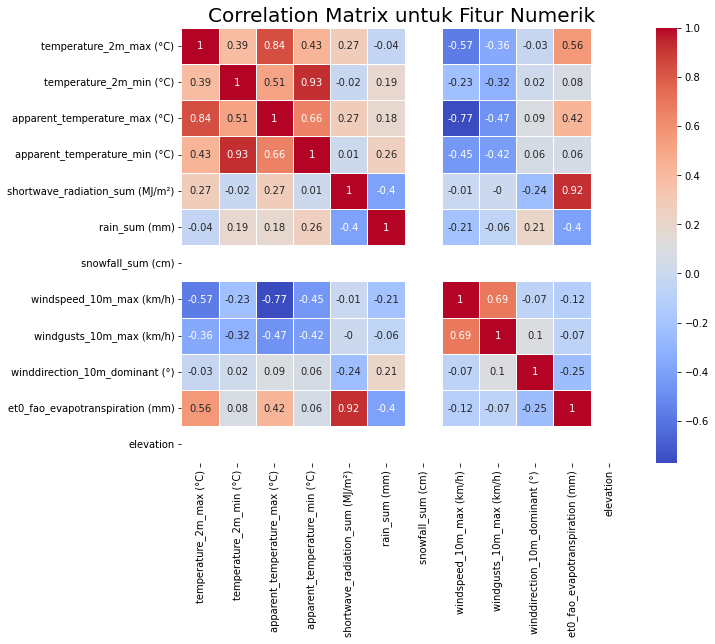

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_baru.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [11]:
# Get the correlation coefficients for "rain_sum" feature
rain_corr = data_baru.corr()['rain_sum (mm)'].sort_values(ascending=False)
rain_corr

rain_sum (mm)                      1.000000
apparent_temperature_min (°C)      0.256609
winddirection_10m_dominant (°)     0.206902
temperature_2m_min (°C)            0.185262
apparent_temperature_max (°C)      0.178085
temperature_2m_max (°C)           -0.042661
windgusts_10m_max (km/h)          -0.064386
windspeed_10m_max (km/h)          -0.209809
et0_fao_evapotranspiration (mm)   -0.395075
shortwave_radiation_sum (MJ/m²)   -0.404086
snowfall_sum (cm)                       NaN
elevation                               NaN
Name: rain_sum (mm), dtype: float64

#### Data preparation

ubah sunrise jadi datetime 64

In [12]:
# Inspect "sunrise" column
data_baru['sunrise (iso8601)']

time
2018-01-01    2018-01-01T05:15
2018-01-01    2018-01-01T05:03
2018-01-01    2018-01-01T05:36
2018-01-01    2018-01-01T05:04
2018-01-02    2018-01-02T05:15
                    ...       
2021-07-31    2021-07-31T05:40
2021-07-31    2021-07-31T05:31
2021-08-01    2021-08-01T05:31
2021-08-01    2021-08-01T05:40
2021-08-01    2021-08-01T05:31
Name: sunrise (iso8601), Length: 3928, dtype: object

In [13]:
data_baru['sunrise (datetime64)'] = pd.to_datetime(data_baru['sunrise (iso8601)'], format='%Y-%m-%dT%H:%M:%S')

data_baru['sunrise (datetime64)']



time
2018-01-01   2018-01-01 05:15:00
2018-01-01   2018-01-01 05:03:00
2018-01-01   2018-01-01 05:36:00
2018-01-01   2018-01-01 05:04:00
2018-01-02   2018-01-02 05:15:00
                     ...        
2021-07-31   2021-07-31 05:40:00
2021-07-31   2021-07-31 05:31:00
2021-08-01   2021-08-01 05:31:00
2021-08-01   2021-08-01 05:40:00
2021-08-01   2021-08-01 05:31:00
Name: sunrise (datetime64), Length: 3928, dtype: datetime64[ns]

In [14]:
# Inspect "sunrise" column
data_baru['sunset (iso8601)']

time
2018-01-01    2018-01-01T17:49
2018-01-01    2018-01-01T17:41
2018-01-01    2018-01-01T18:09
2018-01-01    2018-01-01T17:41
2018-01-02    2018-01-02T17:50
                    ...       
2021-07-31    2021-07-31T17:30
2021-07-31    2021-07-31T17:18
2021-08-01    2021-08-01T17:18
2021-08-01    2021-08-01T17:30
2021-08-01    2021-08-01T17:19
Name: sunset (iso8601), Length: 3928, dtype: object

In [15]:
data_baru['sunset (datetime64)'] = pd.to_datetime(data_baru['sunset (iso8601)'], format='%Y-%m-%dT%H:%M:%S')

data_baru['sunset (datetime64)']

time
2018-01-01   2018-01-01 17:49:00
2018-01-01   2018-01-01 17:41:00
2018-01-01   2018-01-01 18:09:00
2018-01-01   2018-01-01 17:41:00
2018-01-02   2018-01-02 17:50:00
                     ...        
2021-07-31   2021-07-31 17:30:00
2021-07-31   2021-07-31 17:18:00
2021-08-01   2021-08-01 17:18:00
2021-08-01   2021-08-01 17:30:00
2021-08-01   2021-08-01 17:19:00
Name: sunset (datetime64), Length: 3928, dtype: datetime64[ns]

membuat kolom klasifikasi

In [16]:
klasifikasi = []
for kategori in data_baru['rain_sum (mm)']:
    if(kategori > 0):
        klasifikasi.append('rain')
    else:
        klasifikasi.append('no rain')

data_baru['klasifikasi'] = klasifikasi
data_baru.head()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city,sunrise (datetime64),sunset (datetime64),klasifikasi
time,,,,,,,,,,,,,,,,,,
2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su,2018-01-01 05:15:00,2018-01-01 17:49:00,rain
2018-01-01,27.5,25.6,33.1,30.2,2018-01-01T05:03,2018-01-01T17:41,18.15,7.5,0.0,17.6,32.0,255.0,3.46,0,u,2018-01-01 05:03:00,2018-01-01 17:41:00,rain
2018-01-01,33.3,25.0,40.9,30.7,2018-01-01T05:36,2018-01-01T18:09,23.24,4.9,0.0,6.9,22.3,252.0,4.93,0,le,2018-01-01 05:36:00,2018-01-01 18:09:00,rain
2018-01-01,29.4,25.7,36.9,31.4,2018-01-01T05:04,2018-01-01T17:41,19.10,15.2,0.0,6.7,24.5,220.0,3.92,0,si,2018-01-01 05:04:00,2018-01-01 17:41:00,rain
2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su,2018-01-02 05:15:00,2018-01-02 17:50:00,rain


#### one-hot encoding

mengubah data kategori dengan one-hot encoding

In [17]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3928 entries, 2018-01-01 to 2021-08-01
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   temperature_2m_max (°C)          3928 non-null   float64       
 1   temperature_2m_min (°C)          3928 non-null   float64       
 2   apparent_temperature_max (°C)    3928 non-null   float64       
 3   apparent_temperature_min (°C)    3928 non-null   float64       
 4   sunrise (iso8601)                3928 non-null   object        
 5   sunset (iso8601)                 3928 non-null   object        
 6   shortwave_radiation_sum (MJ/m²)  3928 non-null   float64       
 7   rain_sum (mm)                    3928 non-null   float64       
 8   snowfall_sum (cm)                3928 non-null   float64       
 9   windspeed_10m_max (km/h)         3928 non-null   float64       
 10  windgusts_10m_max (km/h)         3928 non-null   f

In [18]:
data_baru = data_baru.drop(data_baru.columns[[4, 5, 8, 11, 13, 14]], axis=1)
data_baru = pd.get_dummies(data_baru)
data_baru

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),et0_fao_evapotranspiration (mm),sunrise (datetime64),sunset (datetime64),klasifikasi_no rain,klasifikasi_rain
time,,,,,,,,,,,,,
2018-01-01,29.9,26.0,36.3,31.6,17.59,7.7,6.9,20.2,3.61,2018-01-01 05:15:00,2018-01-01 17:49:00,0,1
2018-01-01,27.5,25.6,33.1,30.2,18.15,7.5,17.6,32.0,3.46,2018-01-01 05:03:00,2018-01-01 17:41:00,0,1
2018-01-01,33.3,25.0,40.9,30.7,23.24,4.9,6.9,22.3,4.93,2018-01-01 05:36:00,2018-01-01 18:09:00,0,1
2018-01-01,29.4,25.7,36.9,31.4,19.10,15.2,6.7,24.5,3.92,2018-01-01 05:04:00,2018-01-01 17:41:00,0,1
2018-01-02,30.6,25.7,37.7,31.2,19.87,9.4,7.1,18.0,4.11,2018-01-02 05:15:00,2018-01-02 17:50:00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31,32.1,25.6,37.8,30.9,21.54,0.0,9.2,20.2,4.61,2021-07-31 05:40:00,2021-07-31 17:30:00,1,0
2021-07-31,27.2,24.5,30.8,28.3,18.58,1.1,23.4,36.0,3.43,2021-07-31 05:31:00,2021-07-31 17:18:00,0,1
2021-08-01,26.8,24.3,29.8,27.8,18.20,1.6,23.2,36.0,3.29,2021-08-01 05:31:00,2021-08-01 17:18:00,0,1


In [19]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3928 entries, 2018-01-01 to 2021-08-01
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   temperature_2m_max (°C)          3928 non-null   float64       
 1   temperature_2m_min (°C)          3928 non-null   float64       
 2   apparent_temperature_max (°C)    3928 non-null   float64       
 3   apparent_temperature_min (°C)    3928 non-null   float64       
 4   shortwave_radiation_sum (MJ/m²)  3928 non-null   float64       
 5   rain_sum (mm)                    3928 non-null   float64       
 6   windspeed_10m_max (km/h)         3928 non-null   float64       
 7   windgusts_10m_max (km/h)         3928 non-null   float64       
 8   et0_fao_evapotranspiration (mm)  3928 non-null   float64       
 9   sunrise (datetime64)             3928 non-null   datetime64[ns]
 10  sunset (datetime64)              3928 non-null   d

Membagi data train dataset

In [20]:
from sklearn import preprocessing

df_new = data_baru
X = df_new.drop(df_new.columns[[5, 9, 10,11,12]], axis=1)

In [21]:
y = df_new[['klasifikasi_rain','klasifikasi_no rain']]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

### Model Development

mendefenisikan hyperparameter

In [23]:
from scipy.stats import uniform
import numpy as np

params = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(-3, 0, 50)
}

Tuning dengan RSCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor, XGBClassifier

# Define the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic'
    )

# Perform random search
search = RandomizedSearchCV(
    xgb_model, param_distributions=params, 
    n_iter=30, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=-1
    )
search.fit(X_train, y_train)
print("Best hyperparameters: ", search.best_params_)
print("AUC_ROC", search.best_score_)

Best hyperparameters:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.10481131341546852}
AUC_ROC 0.9228996991890612


In [25]:
from sklearn.model_selection import GridSearchCV

#fine search
best_params = search.best_params_
param_dist = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(np.log10(best_params['learning_rate']-0.01), np.log10(best_params['learning_rate']+0.01), 50),
}

fine_search = GridSearchCV(
    xgb_model, param_grid=param_dist, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=-1
    )
fine_search.fit(X_train, y_train)

print("Best hyperparameters: ", fine_search.best_params_)
print("AUC_ROC", fine_search.best_score_)

Best hyperparameters:  {'learning_rate': 0.1134737555857552, 'max_depth': 6, 'n_estimators': 100}
AUC_ROC 0.9232826877822543


Hasil tuning

In [26]:
results = search.cv_results_
tuning_result = pd.DataFrame(results)
tuning_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.925775,0.026069,0.015401,0.013552,100,6,0.120679,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.929628,0.912354,...,0.926852,0.914133,0.932905,0.914916,0.919111,0.925337,0.918364,0.921960,0.006741,2
1,1.061886,0.048723,0.010801,0.002272,100,6,0.025595,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.923537,0.901619,...,0.906491,0.900845,0.922517,0.899187,0.914820,0.919829,0.904299,0.910975,0.008998,15
2,0.928475,0.036998,0.010201,0.000872,100,6,0.104811,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.933989,0.913951,...,0.923566,0.918131,0.928624,0.917957,0.922208,0.923960,0.923925,0.922900,0.005349,1
3,0.939575,0.021315,0.010101,0.001136,100,6,0.244205,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.924681,0.911143,...,0.925774,0.910698,0.924488,0.921274,0.922153,0.922685,0.912617,0.920516,0.006314,5
4,1.105888,0.015159,0.011402,0.003072,100,6,0.002683,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.889894,0.880340,...,0.890385,0.877815,0.910110,0.874641,0.884778,0.889229,0.878902,0.885595,0.009706,27


In [27]:
import numpy as np

print("Best hyperparameters: ", search.best_params_)
print("AUC_ROC", search.best_score_)


Best hyperparameters:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.10481131341546852}
AUC_ROC 0.9228996991890612


### Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


# Train and evaluate the model with best hyperparameters on the validation set
best_xgb_model = XGBClassifier(**search.best_params_,objective='binary:logistic')
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)


# calculate the accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# calculate the ROC-AUC score of the model
roc_auc = roc_auc_score(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1-score: 0.86
ROC-AUC score: 0.84


In [29]:
from sklearn.metrics import  classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       557
           1       0.78      0.73      0.76       229

   micro avg       0.86      0.86      0.86       786
   macro avg       0.84      0.82      0.83       786
weighted avg       0.86      0.86      0.86       786
 samples avg       0.86      0.86      0.86       786



#### confussion matrix

[[509  61]
 [ 48 168]]


<AxesSubplot:>

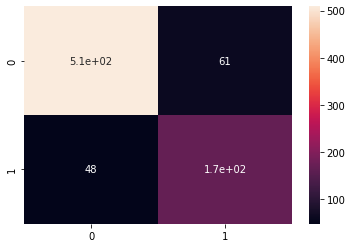

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True)

#### Visualisasi Tuning

In [31]:
result_coarse = search.cv_results_
result_fine = fine_search.cv_results_

In [32]:
params_key = [f"param_{p}" for p in params.keys()]
params_key.append('AUC_ROC')

In [33]:
import pandas as pd

AUC = []
for mean_score in result_coarse["mean_test_score"]:
    AUC.append(mean_score)
aoc_roc = {}
aoc_roc['AUC_ROC'] = AUC
result_coarse['AUC_ROC'] = AUC

In [34]:
AUC_Fine = []
for mean_score in result_fine["mean_test_score"]:
    AUC_Fine.append(mean_score)
aoc_roc_fine = {}
aoc_roc_fine['AUC_ROC'] = AUC_Fine
result_fine['AUC_ROC'] = AUC_Fine

In [36]:
import plotly.express as px
import plotly.graph_objs as go

# create a dataframe from results
fig = px.scatter(result_coarse, x = params_key[2], 
                    y = params_key[3], 
                    color = 'AUC_ROC')
fig.add_trace(px.scatter(result_fine, x = params_key[2], 
                    y = params_key[3]).data[0])

# menyatukan kedua plot dalam satu objek

fig.show()
